### $\textit{Xola Ndaliso}$
### $\textit{Tutorial 3 Computational Astrophysics}$

In [1]:
import numpy as np
import pylab as pl
import astropy.units as u

Mg_0 = 5.0e+9
Mst_0 = 0.
Zg_0 = 0
Mzg_0 = Zg_0*Mg_0   #from Zg = Mzg/Mg
Zst_0 = 0           #initially stars have zero metals
Mzst_0 = Zst_0*(-Mg_0)  #from Zst = Mzst/Mst


def C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0):
    
    psi, R, h, yz = 20e6, .43, 20e+6, .03   #h is dt
    t = np.arange(0., 10e+9, 20e+6)
    Mgas, Mzg, Zg, Mzst = np.zeros(len(t)), np.empty(len(t)), np.empty(len(t)), np.empty(len(t))
    Mst = np.empty(len(t))

    for i in range(len(t)):
        
        M_g = Mg_0 + (-psi + R*psi)*h           #gas mass calculation using Euler
        Mg_0 = M_g                              #updating for each time step
        
        M_st = Mst_0 + (1 - R)*psi*h
        Mst_0 = M_st
        
        M_zg = Mzg_0 + (-Zg_0*psi + yz*psi)*h    #mass of gas-phase metals
        Mzg_0 = M_zg
        
        M_zst = Mzst_0 + (1 - R)*Zg_0*psi*h      #stellar metallicity
        Mzst_0 = M_zst
        
        Z_g = M_zg/M_g                            #gas metallicity parameter
        Zg_0 = Z_g
        
        Mgas[i], Mst[i], Zg[i], Mzg[i], Mzst[i], = M_g, M_st, Z_g, M_zg, M_zst  #storing at each time step

    return Mgas, Mst, Zg, Mzg, Mzst

def L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0):
    
    psi, R, h, yz, alpha = 20e6, .43, 20e+6, .03, .8
    t = np.arange(0., 10e+9, 20e+6)   
    Mgas, Mzg, Zg, Mzst = np.zeros(len(t)), np.empty(len(t)), np.empty(len(t)), np.empty(len(t))
    Mst = np.empty(len(t))
    
    for i  in range(len(t)):
        
        M_g = Mg_0 + (-psi + R*psi)*h         #step 1: gas mass from SNe
        Mg_0 = M_g

        M_zg = Mzg_0 + (-Zg_0*psi + yz*psi)*h   #step1: gas phase metals
        Mzg_0 = M_zg
        
        M_st = Mst_0 + (psi - R*psi)*h
        Mst_0 = M_st
        
        M_zst = Mzst_0 + (Zg_0*psi - yz*psi)*h     #step1: mass of stellar metals
        Mzst_0 = M_zst
        
        Z_g = M_zg/M_g                            #step 2: gas metallicity 
        Zg_0 = Z_g
        
        M_g = Mg_0 + (-alpha*psi)*h             #step 3: amount of mass removed from the box
        Mg_0 = M_g
        
        M_zg = Mzg_0 + (-alpha*Zg_0*psi)*h       #step 3: amount of gas-phase metal mass removed
        Mzg_0 = M_zg
        
        M_zst = Mzst_0 + (Zg_0*alpha*psi)*h    
        Mzst_0 = M_zst

        Mgas[i], Mst[i], Zg[i], Mzg[i], Mzst[i], = M_g, M_st, Z_g, M_zg, M_zst
    
    return Mgas, Mst, Zg, Mzg, Mzst

def A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0):
    
    psi, R, h, yz, alpha, Z_i = 20e6, .43, 20e+6, .03, .8, 0.0
    beta = (1 - R)*psi
    t = np.arange(0., 10e+9, 20e+6)   
    Mgas, Mzg, Zg, Mzst = np.zeros(len(t)), np.empty(len(t)), np.empty(len(t)), np.empty(len(t))
    Mst = np.empty(len(t))
    
    for i in range(len(t)):
        
        M_g = Mg_0 + (-psi + R*psi + beta)*h
        Mg_0 = M_g
        
        M_zg = Mzg_0 + (-Zg_0*psi + yz*psi + Z_i*beta)*h
        Mzg_0 = M_zg
        
        M_st = Mst_0 + (psi - R*psi)*h
        Mst_0 = M_st
        
        M_zst = Mzst_0 + (Zg_0*psi - yz*psi)*h
        Mzst_0 = M_zst
          
        Z_g = M_zg/M_g
        Zg_0 = Z_g
        
        Mgas[i], Mst[i], Zg[i], Mzg[i], Mzst[i], = M_g, M_st, Z_g, M_zg, M_zst
        
    return Mgas, Mst, Zg, Mzg, Mzst 

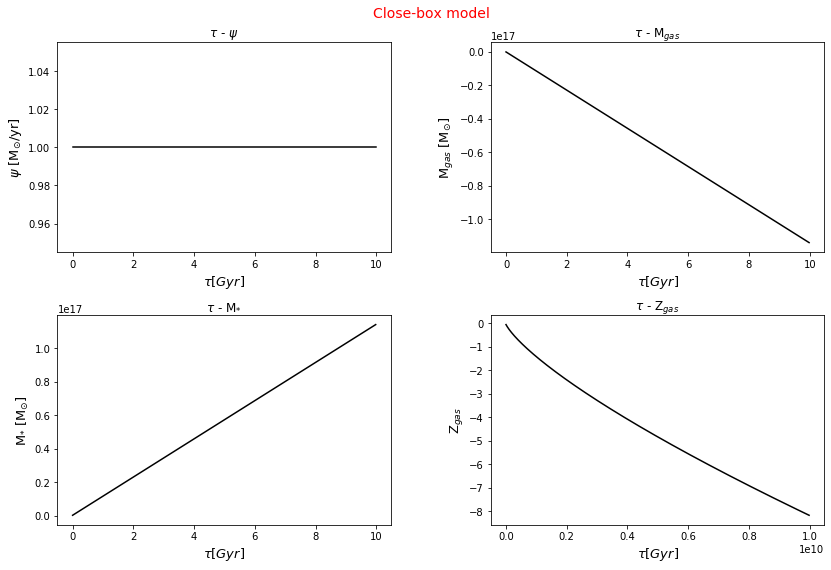

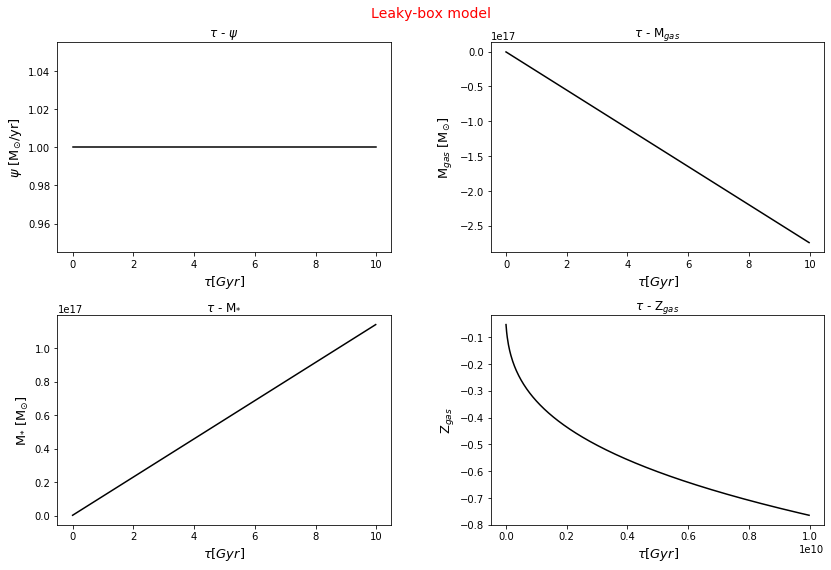

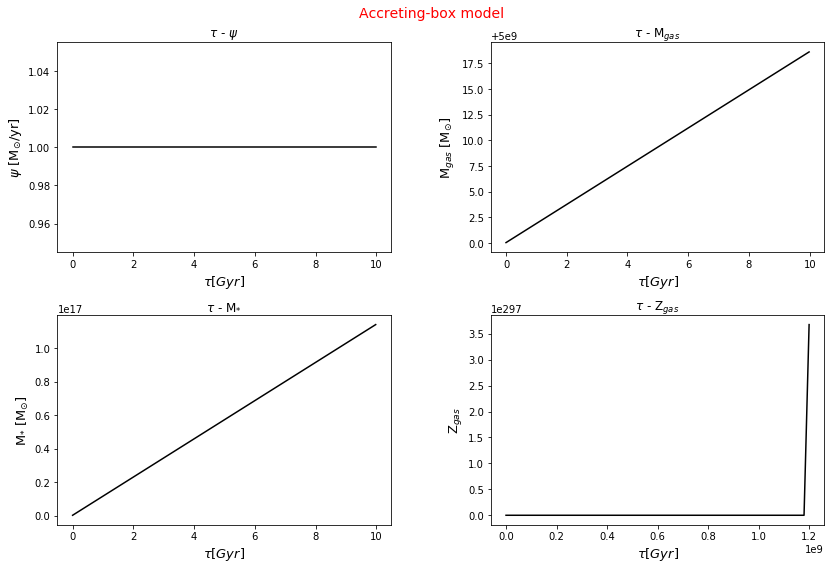

In [2]:
t = np.arange(0., 10e+9, 20e+6) 
psi = np.ones(len(t))

#Closed-box model
Mgas_cbm = C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0]    #reading gas mass
Ms_cbm = C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[1]      #reading stellar mass
Zg_cbm = C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[2]       #reading gas metallicity
Zs_cbm = C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[4]/Ms_cbm   #reading stellar metallicity as: Zs = Mzs/Ms

#Leaky-box model
Mgas_lbm = L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0]
Ms_lbm = L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[1]
Zg_lbm = L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[2]
Zs_lbm = L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[4]/Ms_lbm

#Acretting-box model
Mgas_abm = A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0]
Ms_abm = A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[1]
Zg_abm = A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[2]
Zs_abm = A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[4]/Ms_abm

#dictionary with all this data
d_dat = {'Mgas':[Mgas_cbm, Mgas_lbm, Mgas_abm], 'Mst':[Ms_cbm, Ms_lbm, Ms_abm], 'Zg': [Zg_cbm, Zg_lbm, Zg_abm],
        'gce': ['Close-box model', 'Leaky-box model', 'Accreting-box model']}

for i in range(3):
    
    pl.subplot(221, title = '$\\tau$ - $\psi$')  #star formation rate plot
    pl.plot(t/1e+9, psi, c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('$\psi$ [M$_{\odot}$/yr]', fontsize = 13)

    pl.subplot(222, title = '$\\tau$ - M$_{gas}$')   #gas mass plot 
    pl.plot(t/1e+9, d_dat['Mgas'][i], c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('M$_{gas}$ [M$_{\odot}$]', fontsize = 13)

    pl.subplot(223, title = '$\\tau$ - M$_{*}$')   #stellar mass plot
    pl.plot(t/1e+9, d_dat['Mst'][i], c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)

    pl.subplot(224, title = '$\\tau$ - Z$_{gas}$')   #gas metallicity plot
    pl.plot(t, d_dat['Zg'][i] , c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('Z$_{gas}$', fontsize = 13)
    
    
    pl.suptitle(d_dat['gce'][i], x = 0.99, y = 1.9, ha = 'center', va = 'center', color = 'r', fontsize = 14)
    pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
    pl.show()

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/xoks/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


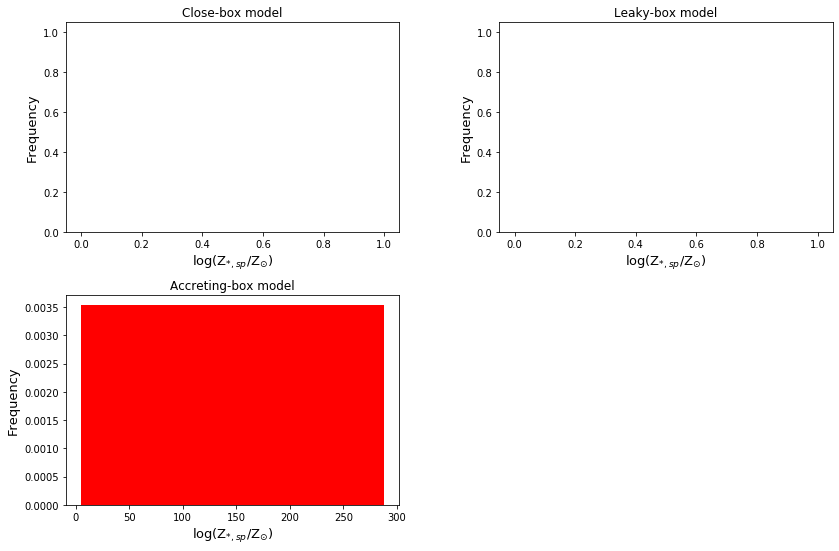

In [3]:
#same dictionary just added the stellar metallicities: 'Zs'

d_dat = {'Mgas':[Mgas_cbm, Mgas_lbm, Mgas_abm], 'Mst':[Ms_cbm, Ms_lbm, Ms_abm], 'Zg': [Zg_cbm, Zg_lbm, Zg_abm],
        'Zs':[Zs_cbm, Zs_lbm, Zs_abm],'gce': ['Close-box model', 'Leaky-box model', 'Accreting-box model']}

Z_sol = 0.0134

for i in range(3):
    pl.subplot(220 + i + 1, title = d_dat['gce'][i])
    dist = np.log10(d_dat['Zs'][i]/Z_sol)
    dist[np.isnan(dist)], dist[np.isinf(dist)] = 0, 0
    values = np.where(dist != 0.)
    pl.hist(dist[values], density = True, color = 'r')
    pl.xlabel('log(Z$_{*,sp}$/Z$_{\odot}$)', fontsize = 13)
    pl.ylabel('Frequency', fontsize = 13)

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.show()

dd = d_dat['Zs'][0]/Z_sol

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


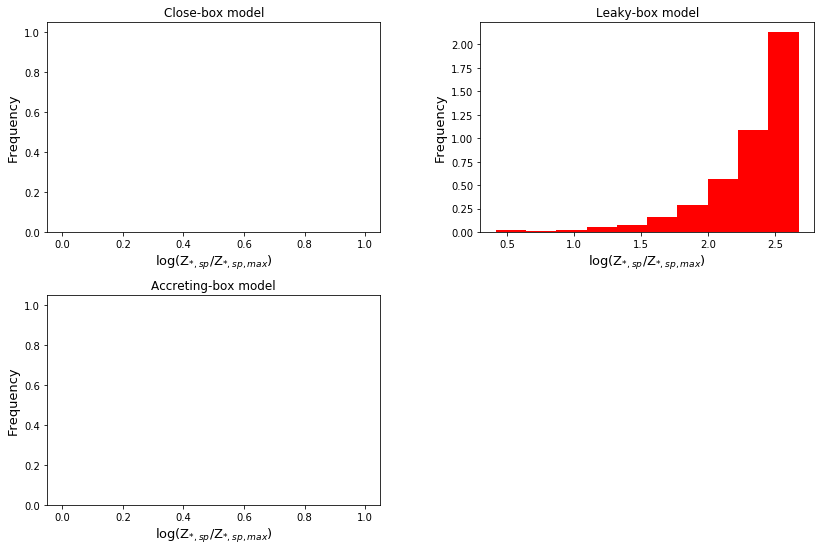

In [4]:
for i in range(3):
    pl.subplot(220 + i + 1, title = d_dat['gce'][i])
    cumlt = np.log(d_dat['Zs'][i]/np.max(d_dat['Zs'][i]))
    cumlt[np.isnan(cumlt)] = 0
    cumlt[np.isinf(cumlt)] = 0
    values = np.where(cumlt != 0.)
    pl.hist(cumlt[values], normed = True, color = 'r')
    pl.xlabel('log(Z$_{*,sp}$/Z$_{*,sp,max}$)', fontsize = 13)
    pl.ylabel('Frequency', fontsize = 13)

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.show()

In [5]:
#I assume ouflows -> infall in this model
#taken from the formalism of a Galactic Fountain

def B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0):
    
    psi, R, h, yz, alpha, Z_i = 1.0, .43, 20e+6, .03, .8, 0.0
    t = np.arange(0., 10e+9, 20e+6) 
    beta = (1 - R)*psi  
    Mgas, Mzg, Zg, Mzst = np.zeros(len(t)), np.empty(len(t)), np.empty(len(t)), np.empty(len(t))
    Mst = [np.empty(len(t)) for _ in range(2)]
    
    for i  in range(len(t)):
        
        Mgas[i], Mst[0][i] = Mg_0, Mst_0   #in Mst 0 idx is Mst_tot, 1 idx is Mst per time step
        Mzg[i], Zg[i] = Mzg_0, Zg_0 
        
        Mg_0 += (-1 + R)*psi*h         #step 1: gas mass from SNe
        
        Mzg_0 += (-Zg_0*psi + yz*psi)*h   #step1: gas phase metals
        
        M_st = (1 - R)*psi*h
        Mst_0 += M_st
        
        Mzst_0 += (1 - R)*Zg_0*psi*h     #step1: mass of stellar metals
        
        Zg_0 = Mzg_0/Mg_0                            #step 2: gas metallicity 
        
        Mg_0 += (-alpha*psi)*h             #step 3: amount of mass removed from the box
        
        Mzg_0 += (-alpha*Zg_0*psi)*h       #step 3: amount of gas-phase metal mass removed
                
        Mst[1][i], Mzst[i] = M_st, Mzst_0
                                                  ####[INFALLS - thinking of a Galactic Fountain]
        Mg_0 += (-psi + R*psi + beta)*h
        
        Mzg_0 += (-Zg_0*psi + yz*psi + Z_i*beta)*h
        
        M_st = (psi - R*psi)*h
        Mst_0 += M_st
        
        Mzst_0 += (1 - R)*Zg_0*psi*h
          
        Zg_0 = Mzg_0/Mg_0
        
        Mst[1][i], Mzst[i] = M_st, Mzst_0
        
    return Mgas, Mst, Zg, Mzg, Mzst 

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

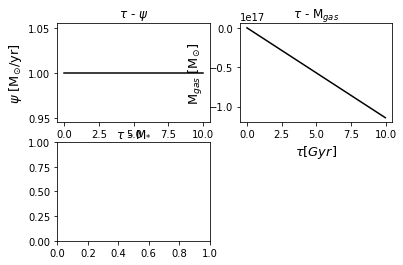

In [6]:
t = np.arange(0., 10e+9, 20e+6) 
psi = np.ones(len(t))

#Breathing-box model
Mgas_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0]
Ms_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[1]
Zg_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[2]
Mzs_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[4]
Zs_bbm = Mzs_bbm/Ms_bbm[1]


#dictionary with all this data
d_dat = {'Mgas':[Mgas_cbm, Mgas_lbm, Mgas_abm, Mgas_bbm], 'Mst':[Ms_cbm, Ms_lbm, Ms_abm, Ms_bbm], 
        'Zg': [Zg_cbm, Zg_lbm, Zg_abm, Zg_bbm],
         'gce': ['Close-box model', 'Leaky-box model', 'Accreting-box model', 'Breathing-box model']}

for i in range(4):
    
    pl.subplot(221, title = '$\\tau$ - $\psi$')  #star formation rate plot
    pl.plot(t/1e+9, psi, c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('$\psi$ [M$_{\odot}$/yr]', fontsize = 13)

    pl.subplot(222, title = '$\\tau$ - M$_{gas}$')   #gas mass plot 
    pl.plot(t/1e+9, d_dat['Mgas'][i], c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('M$_{gas}$ [M$_{\odot}$]', fontsize = 13)

    pl.subplot(223, title = '$\\tau$ - M$_{*}$')   #stellar mass plot
    pl.plot(t/1e+9, d_dat['Mst'][i][0], c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)

    pl.subplot(224, title = '$\\tau$ - Z$_{gas}$')   #gas metallicity plot
    pl.plot(t, d_dat['Zg'][i] , c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('Z$_{gas}$', fontsize = 13)
    
    
    pl.suptitle(d_dat['gce'][i], x = 0.99, y = 1.9, ha = 'center', va = 'center', color = 'r', fontsize = 14)
    pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
    pl.show()

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/home/xoks/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


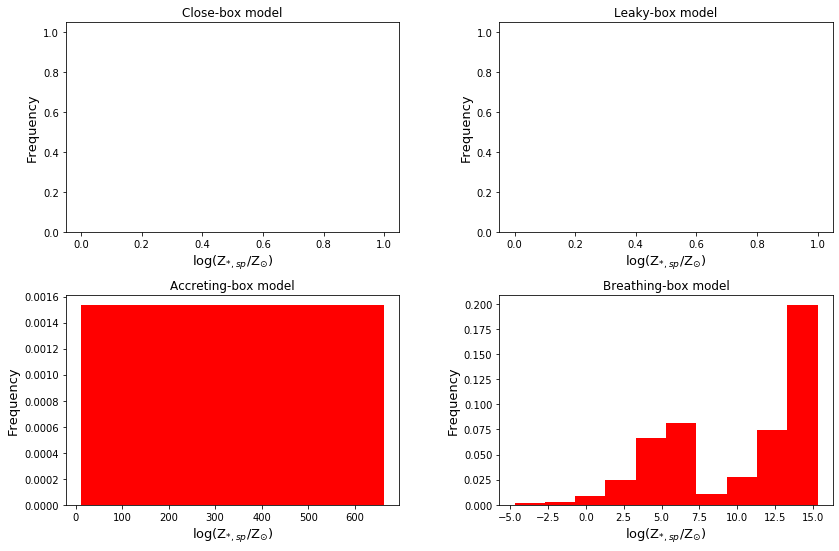

In [7]:
d_dat = {'Mgas':[Mgas_cbm, Mgas_lbm, Mgas_abm, Mgas_bbm], 'Mst':[Ms_cbm, Ms_lbm, Ms_abm, Ms_bbm], 
        'Zg': [Zg_cbm, Zg_lbm, Zg_abm, Zg_bbm], 'Zs':[Zs_cbm, Zs_lbm, Zs_abm, Zs_bbm],
         'gce': ['Close-box model', 'Leaky-box model', 'Accreting-box model', 'Breathing-box model']}

Z_sol = 0.0134

for i in range(4):
    pl.subplot(220 + i + 1, title = d_dat['gce'][i])
    dist = np.log(d_dat['Zs'][i]/Z_sol)
    dist[np.isnan(dist)], dist[np.isinf(dist)] = 0, 0
    values = np.where(dist != 0.)
    pl.hist(dist[values], density = True, color = 'r')
    pl.xlabel('log(Z$_{*,sp}$/Z$_{\odot}$)', fontsize = 13)
    pl.ylabel('Frequency', fontsize = 13)

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.show()

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


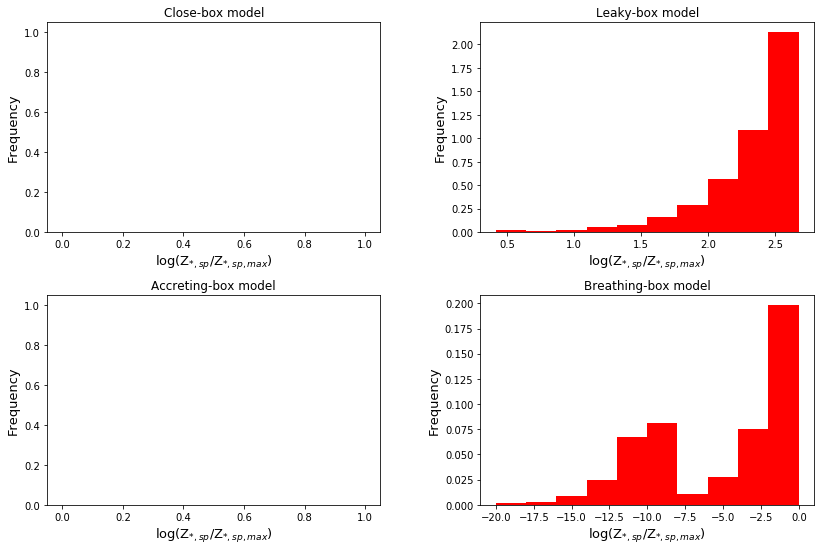

In [8]:
for i in range(4):
    pl.subplot(220 + i + 1, title = d_dat['gce'][i])
    cumlt = np.log(d_dat['Zs'][i]/np.max(d_dat['Zs'][i]))
    cumlt[np.isnan(cumlt)] = 0
    cumlt[np.isinf(cumlt)] = 0
    values = np.where(cumlt != 0.)
    pl.hist(cumlt[values], normed = True, color = 'r')
    pl.xlabel('log(Z$_{*,sp}$/Z$_{*,sp,max}$)', fontsize = 13)
    pl.ylabel('Frequency', fontsize = 13)

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.show()